## Research title: 
## Authors:
### Vladimir Milchev
### Kristofar Stavrev
### Radoslava Dencheva
### Stoyan Stoyanov




## 1.Import all necessary libraries

In [151]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob 
#conda install yahoofinancials
from yahoofinancials import YahooFinancials

In [152]:
"""Constants"""
TICKER_BTC = "BTC-USD"
TICKER_NASDAQ = "^IXIC"
TICKER_SNP = "^GSPC"
#START_DATE = "2014-01-01"
#END_DATE = datetime.now().strftime('%Y-%m-%d')
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 100)

## 2. Data Collection

### Get data for BTC

In [153]:
btc_financials = YahooFinancials(TICKER_BTC)
data=btc_financials.get_historical_price_data(START_DATE, END_DATE, "daily")
btc_df = pd.DataFrame(data[TICKER_BTC]['prices'])

### Get data for S&P 500

In [154]:
snp_financials = YahooFinancials(TICKER_SNP)
data=snp_financials.get_historical_price_data(START_DATE, END_DATE, "daily")
snp_df = pd.DataFrame(data[TICKER_SNP]['prices'])

## Data preparation

In [155]:
#Put all unecessarry columns in an array
to_drop = ['high', 'low', 'open', 'volume', 'adjclose', 
       'formatted_date']

### Prepare BTC data

In [156]:
#rename close column to price
btc_df = btc_df.rename(columns = {"close":"btc_price"})

#get START_DATE and END_DATE
START_DATE =  min(btc_df.formatted_date)
END_DATE = max(btc_df.formatted_date)
#drop unecessary columns, create date column and set as index
btc_df.date = pd.to_datetime(btc_df.formatted_date)
btc_df = btc_df.drop(to_drop, axis=1).set_index("date")




#Remove duplicated indexes/dates for BTC
if btc_df.index.duplicated().any():
    btc_df = btc_df.loc[~btc_df.index.duplicated(), :]
btc_df= btc_df.reindex(pd.date_range(start=START_DATE, end=END_DATE, freq='D'))

#Add missing dates
btc_df= btc_df.reindex(pd.date_range(start=START_DATE, end=END_DATE, freq='D'))

#Use forward propagation to fill missing values
btc_df = btc_df.fillna(method="ffill")
btc_df

,btc_price
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2022-03-30,47062.664062
2022-03-31,45538.675781
2022-04-01,46281.644531
2022-04-02,45868.949219


### Prepare S&P 500 data

In [157]:
#rename close column to price
snp_df = snp_df.rename(columns = {"close":"snp_price"})

#drop unecessary columns, create date column and set as index
snp_df.date = pd.to_datetime(snp_df.formatted_date)
snp_df = snp_df.drop(to_drop, axis=1).set_index("date")

#Remove duplicated indexes/dates for BTC
if snp_df.index.duplicated().any():
    snp_df = snp_df.loc[~snp_df.index.duplicated(), :]
snp_df= snp_df.reindex(pd.date_range(start=START_DATE, end=END_DATE, freq='D'))

#Add missing dates
snp_df= snp_df.reindex(pd.date_range(start=START_DATE, end=END_DATE, freq='D'))

#Use forward propagation to fill missing values
snp_df = snp_df.fillna(method="ffill")

In [158]:
df = pd.merge(snp_df, btc_df, left_index=True, right_index=True)
df

,snp_price,btc_price
2014-09-17,2001.569946,457.334015
2014-09-18,2011.359985,424.440002
2014-09-19,2010.400024,394.795990
2014-09-20,2010.400024,408.903992
2014-09-21,2010.400024,398.821014
...,...,...
2022-03-30,4602.450195,47062.664062
2022-03-31,4530.410156,45538.675781
2022-04-01,4545.859863,46281.644531
2022-04-02,4545.859863,45868.949219


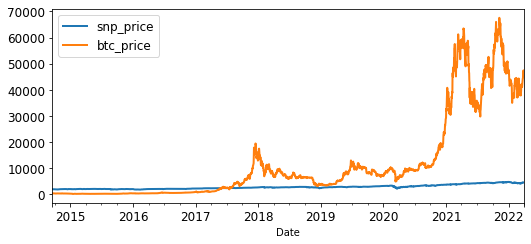

In [160]:
# Plot time series dataset
ax = df.plot(linewidth=2, fontsize=12);

# Additional customizations
ax.set_xlabel('Date');
ax.legend(fontsize=12);

In [125]:
btc_df.price.isnull().sum()

259

In [126]:
snp_df.price.isnull().sum()

937

In [127]:
len(btc_df.index)

3015

In [128]:
len(snp_df.index)

3015

,price
date,
NaT,NaN
